In [2]:
%matplotlib inline
import numpy as np
import sqlite3
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer

/home/rohan/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/home/rohan/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


In [3]:
df=pd.read_csv("Kiit.csv")
df

,Unnamed: 0,Reviews
0,0,\n The placements ...
1,1,\n The infrastruct...
2,2,The placements from KIIT has always been good...
3,3,The infrastructure of the college is very goo...
4,4,The teachers are well-accustomed with the fac...
...,...,...
7625,7625,\n When it comes t...
7626,7626,"The placement was awesome during our batch, a..."
7627,7627,"When it comes to infrastructure, it's includi..."
7628,7628,"Teachers are very helpful, and their backgrou..."


In [4]:
text1=df.iloc[0:7630,-1]
text1

0        \n                            The placements ...
1        \n                            The infrastruct...
2        The placements from KIIT has always been good...
3        The infrastructure of the college is very goo...
4        The teachers are well-accustomed with the fac...
                              ...                        
7625     \n                            When it comes t...
7626     The placement was awesome during our batch, a...
7627     When it comes to infrastructure, it's includi...
7628     Teachers are very helpful, and their backgrou...
7629     Various events from various societies take pl...
Name: Reviews, Length: 7630, dtype: object

In [5]:
demo=[]
for i in range(7630):
    demo.append(text1.iloc[i])
demo

[' \n                            The placements from KIIT has always been good with 85% of the placement. There are many opportunities as very top notch companies also visit KIIT like Microsoft and Deloitte. The highest placement offered was around 23 LPA, and the average is 3.5 LPA- 6.5 LPA. The positions are offered in the companies based on your merit, and there are a host of companies offering internship now and then as many internships camps are happening to help students with the placements.                    ',
 ' \n                            The infrastructure of the college is very good, and every campus has centralised libraries per school in the department. The Wi-Fi connection is available all over campus and the cl...                    ',
 ' The placements from KIIT has always been good with 85% of the placement. There are many opportunities as very top notch companies also visit KIIT like Microsoft and Deloitte. The highest placement offered was around 23 LPA, and the 

In [6]:
demo=pd.Series(demo).apply(lambda x : x.lower())


In [7]:
import contractions
contracted=[]
for i in range(7630):
    contracted.append(contractions.fix(demo[i]))

In [8]:
contracted

[' \n                            the placements from kiit has always been good with 85% of the placement. there are many opportunities as very top notch companies also visit kiit like microsoft and deloitte. the highest placement offered was around 23 lpa, and the average is 3.5 lpa- 6.5 lpa. the positions are offered in the companies based on your merit, and there are a host of companies offering internship now and then as many internships camps are happening to help students with the placements.                    ',
 ' \n                            the infrastructure of the college is very good, and every campus has centralised libraries per school in the department. the wi-fi connection is available all over campus and the cl...                    ',
 ' the placements from kiit has always been good with 85% of the placement. there are many opportunities as very top notch companies also visit kiit like microsoft and deloitte. the highest placement offered was around 23 lpa, and the 

In [9]:
import re
nstr=[]
#nestr=[]
for i in range(7629):
    
    #nstr.append(re.sub(r'[?|$|.|!]',r'',contracted[i]))
    #nestr.append(re.sub(r'[^a-zA-Z0-9 ]',r'',nstr[i]))
    #print(nestr)
    nstr.append(re.sub(r"[-()\"#/@;:<>{}`+=~%|.!?,\d]", "", contracted[i]))

In [10]:
df1=pd.DataFrame(nstr[0:7629],columns=['Reviews'])
df1

,Reviews
0,\n the placements ...
1,\n the infrastruct...
2,the placements from kiit has always been good...
3,the infrastructure of the college is very goo...
4,the teachers are wellaccustomed with the faci...
...,...
7624,\n the placement w...
7625,\n when it comes t...
7626,the placement was awesome during our batch an...
7627,when it comes to infrastructure it is includi...


In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')
nst=[]
for i in range(7629):
    doc=nlp(nstr[i])
    nst.append(' '.join([token.lemma_ for token in doc if token.ent_type_!='PERSON']))

In [12]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","-PRON-","'s"])

In [13]:
preprocessed_reviews=[]
for sentence in range(7629):
    sentence = ' '.join(e for e in nst[sentence].split() if e not in stopwords)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    preprocessed_reviews.append(sentence.strip())


<>:4: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \S
<ipython-input-13-fc7c47b82d14>:4: DeprecationWarning: invalid escape sequence \S
  sentence = re.sub("\S*\d\S*", "", sentence).strip()


In [14]:
df2=pd.DataFrame(preprocessed_reviews[:],columns=['Reviews'])
df2

,Reviews
0,placement kiit always good placement many oppo...
1,infrastructure college good every campus centr...
2,placement kiit always good placement many oppo...
3,infrastructure college good every campus centr...
4,teacher wellaccustome facility provide student...
...,...
7624,placement awesome batch case senior placement ...
7625,come infrastructure include new lab aerospace ...
7626,placement awesome batch case senior placement ...
7627,come infrastructure include new lab aerospace ...


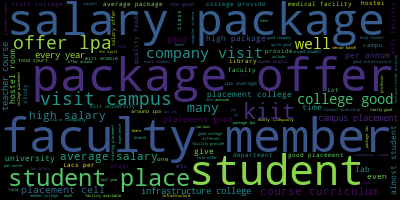

In [15]:
from wordcloud import WordCloud

#Join different processed text together
long_string=','.join(list(df2['Reviews'].values))

#Create a wordcloud object
wordcloud=WordCloud(background_color="black",max_words=50000,contour_width=3,contour_color='steelblue')

#generate wordcloud
wordcloud.generate(long_string)

wordcloud.to_image()

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (7629, 500)
the number of unique words including both unigrams and bigrams  500


/home/rohan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/home/rohan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


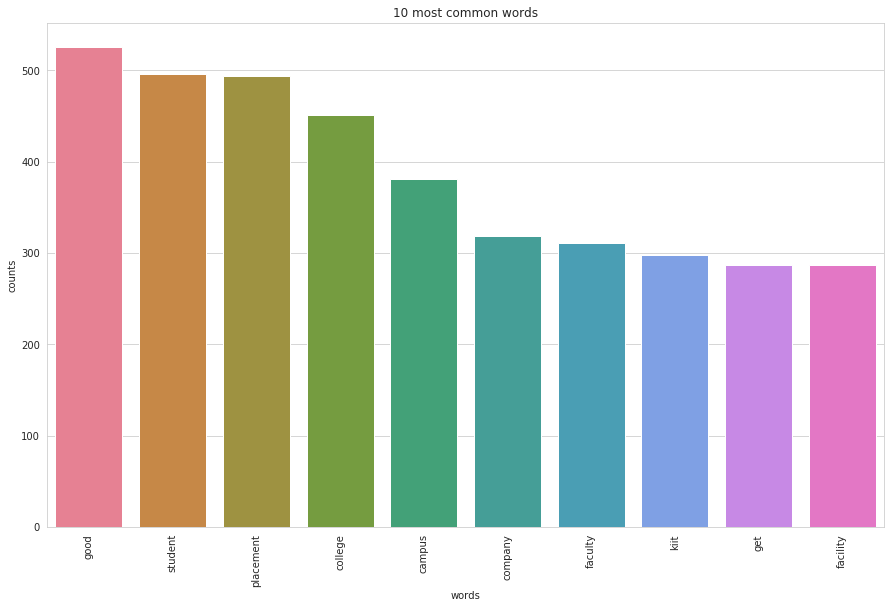

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, tf_idf_vect):
    import matplotlib.pyplot as plt
    words = tf_idf_vect.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

tf_idf_vect = TfidfVectorizer(ngram_range=(1,3),token_pattern=r'\w{3,}',max_features=500)
#tf_idf_vect.fit(df2['Reviews'])
#print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
#print('='*50)

#final_tf_idf = tf_idf_vect.transform(df2['Reviews'])
final1_tf_idf = tf_idf_vect.fit_transform(df2['Reviews'])


print("the type of count vectorizer ",type(final1_tf_idf))
print("the shape of out text TFIDF vectorizer ",final1_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final1_tf_idf.get_shape()[1])


count_data = tf_idf_vect.fit_transform(df2['Reviews'])

# Visualise the 10 most common words
plot_10_most_common_words(final1_tf_idf, tf_idf_vect)

In [17]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, tf_idf_vect, n_top_words):
    words = tf_idf_vect.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(",".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 3
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics,n_jobs=-1,learning_decay=0.9)
lda.fit_transform(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, tf_idf_vect, number_words)

Topics found via LDA:

Topic #0:
placement,company,offer,student,package,get,place,lpa,salary,visit

Topic #1:
facility,infrastructure,campus,hostel,good,classroom,wifi,library,college,food

Topic #2:
faculty,teacher,member,faculty member,course,student,good,helpful,college,event


In [18]:
#materialize the sparse data
data_dense=final1_tf_idf.todense()

#compute sparsicity =percentage of non-zero cells
print("Sparsicity:",((data_dense>0).sum()/data_dense.size)*100,'%')

Sparsicity: 4.551107615677022 %


In [19]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.preprocessing import normalize;
import pickle;
from sklearn.decomposition import NMF;

In [20]:
search_params={'n_components':[3],'learning_decay':[.5,.7,.9]}


#init grid search class
model=GridSearchCV(lda,param_grid=search_params)

#do the grid search
model.fit(final1_tf_idf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.9,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=3, n_jobs=-1,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 total_s

In [21]:
best_lda_model=model.best_estimator_

#best parameters
print("Best Model's Params:",model.best_params_)

#log likelihood score 
print("Best Log Likelihood Score",model.best_score_)

#perplexity
print("Model perplexity",best_lda_model.perplexity(final1_tf_idf))

Best Model's Params: {'learning_decay': 0.5, 'n_components': 3}
Best Log Likelihood Score -40395.571425441754
Model perplexity 340.2167095292054


In [22]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(final1_tf_idf)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df2['Reviews']))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.06,0.87,0.07,1
Doc1,0.81,0.12,0.08,0
Doc2,0.06,0.87,0.07,1
Doc3,0.81,0.1,0.09,0
Doc4,0.26,0.09,0.65,2
Doc5,0.37,0.09,0.53,2
Doc6,0.13,0.8,0.07,1
Doc7,0.83,0.08,0.08,0
Doc8,0.13,0.8,0.07,1
Doc9,0.86,0.06,0.08,0


In [35]:
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, final1_tf_idf, tf_idf_vect, mds='tsne')
panel

/home/rohan/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
1     -1015.700562  1338.981201       1        1  38.668816
0      -387.996002  -373.316162       2        1  31.778035
2     -2184.745605   -60.565800       3        1  29.553149, topic_info=    Category        Freq            Term       Total  loglift  logprob
346  Default  486.000000       placement  486.000000  30.0000  30.0000
150  Default  306.000000         faculty  306.000000  29.0000  29.0000
144  Default  284.000000        facility  284.000000  28.0000  28.0000
222  Default  273.000000  infrastructure  273.000000  27.0000  27.0000
74   Default  314.000000         company  314.000000  26.0000  26.0000
..       ...         ...             ...         ...      ...      ...
129   Topic3   94.835524           every  222.529406   0.3661  -4.6273
11    Topic3   94.824935            also  274.972981   0.1543  -4.6274
281   Topic3   88.353320            many  226.565687   0.2773  -4.6981
496   Topic3   86.992364            year  223.091616   0.2772  -4.7136
485   Topic3   86.375719            well  217.123804   0.2972  -4.7208

[179 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1         1  0.992511      accenture
4         2  0.246308       activity
4         3  0.747134       activity
6         2  0.993888  airconditione
7         1  0.811120         almost
...     ...       ...            ...
491       2  0.989435  wifi facility
492       1  0.982203          wipro
496       1  0.600650           year
496       2  0.008965           year
496       3  0.389974           year

[211 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [24]:
import re, nltk, spacy, gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),deacc=True))
        

In [25]:
data_words=list(sent_to_words(df2['Reviews']))
print(data_words[:1])

[['placement', 'kiit', 'always', 'good', 'placement', 'many', 'opportunity', 'top', 'notch', 'company', 'also', 'visit', 'kiit', 'like', 'microsoft', 'deloitte', 'high', 'placement', 'offer', 'around', 'lpa', 'average', 'lpa', 'position', 'offer', 'company', 'base', 'merit', 'host', 'company', 'offer', 'internship', 'many', 'internship', 'camp', 'happen', 'help', 'student', 'placement']]


In [26]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out=[]
    for sent in texts:
        doc=nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON'] else '' for token in doc if token.pos_ in allowed_postags]))
        print(texts_out)
    return texts_out


In [27]:
nlp=spacy.load('en',disable=['parser','ner'])

data_lemmatized=lemmatization(data_words,allowed_postags=['NOUN','ADJ','VERB','ADV'])

['always good placement many opportunity top notch company also visit high placement offer lpa average lpa position offer company company offer internship many internship camp happen help student placement']
['always good placement many opportunity top notch company also visit high placement offer lpa average lpa position offer company company offer internship many internship camp happen help student placement', 'good campus centralise library department wifi connection available campus']
['always good placement many opportunity top notch company also visit high placement offer lpa average lpa position offer company company offer internship many internship camp happen help student placement', 'good campus centralise library department wifi connection available campus', 'always good placement many opportunity top notch company also visit high placement offer lpa average lpa position offer company company offer internship many internship camp happen help student placement']
['always good

['always good placement many opportunity top notch company also visit high placement offer lpa average lpa position offer company company offer internship many internship camp happen help student placement', 'good campus centralise library department wifi connection available campus', 'always good placement many opportunity top notch company also visit high placement offer lpa average lpa position offer company company offer internship many internship camp happen help student placement', 'good campus centralise library department wifi connection available campus classroom air conditioner comprise new high level equipment requite lab', 'teacher facility provide student always ready help tutormentor section student individually friendly nature student teacher', 'lot event happen year indulge many accord campus separate whole road make evening gathering peer', 'great systematically lot test arrange different vendor give understanding write test company also mock interview arrange various 

['always good placement many opportunity top notch company also visit high placement offer lpa average lpa position offer company company offer internship many internship camp happen help student placement', 'good campus centralise library department wifi connection available campus', 'always good placement many opportunity top notch company also visit high placement offer lpa average lpa position offer company company offer internship many internship camp happen help student placement', 'good campus centralise library department wifi connection available campus classroom air conditioner comprise new high level equipment requite lab', 'teacher facility provide student always ready help tutormentor section student individually friendly nature student teacher', 'lot event happen year indulge many accord campus separate whole road make evening gathering peer', 'great systematically lot test arrange different vendor give understanding write test company also mock interview arrange various 

['always good placement many opportunity top notch company also visit high placement offer lpa average lpa position offer company company offer internship many internship camp happen help student placement', 'good campus centralise library department wifi connection available campus', 'always good placement many opportunity top notch company also visit high placement offer lpa average lpa position offer company company offer internship many internship camp happen help student placement', 'good campus centralise library department wifi connection available campus classroom air conditioner comprise new high level equipment requite lab', 'teacher facility provide student always ready help tutormentor section student individually friendly nature student teacher', 'lot event happen year indulge many accord campus separate whole road make evening gathering peer', 'great systematically lot test arrange different vendor give understanding write test company also mock interview arrange various 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
# Show top n keywords for each topic
def show_topics(vectorizer=tf_idf_vect, lda_model=lda, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tf_idf_vect, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,facility,infrastructure,campus,hostel,good,classroom,wifi,library,college,food,available,lab,room,provide,sport
Topic 1,placement,company,offer,student,package,get,place,lpa,salary,visit,high,good,year,college,student get
Topic 2,faculty,teacher,member,faculty member,course,student,good,helpful,college,event,curriculum,fest,kiit,help,organise


In [29]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    
    mytext_2 = list(sent_to_words(text))
    print(mytext_2)

    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    #print(mytext_3)
   
    mytext_4 = tf_idf_vect.transform(mytext_3)
    #print(mytext_4)

    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["students are bad"]
topic, prob_scores = predict_topic(text = mytext)
print(topic)
print(prob_scores)

[['students', 'are', 'bad']]
['student bad']
['faculty', 'teacher', 'member', 'faculty member', 'course', 'student', 'good', 'helpful', 'college', 'event', 'curriculum', 'fest', 'kiit', 'help', 'organise']
[[0.15726247 0.1667819  0.67595563]]


In [30]:
from sklearn.metrics.pairwise import euclidean_distances

def similar_documents(text,doc_topic_probs,documents=df2['Reviews'],nlp=nlp,top_n=5,verbose=False):
    topic,x=predict_topic(text)
    dist=euclidean_distances(x.reshape(1,-1),doc_topic_probs)[0]
    doc_ids=np.argsort(dist)[:top_n]
    if verbose:
        print("Topic keywords",topic)
        print("Topic prob scores of text",np.round(x,1))
        print("Most similar Doc's Prob",np.round(doc_topic_probs[doc_ids],1))
    return doc_ids,np.take(documents,doc_ids)    

In [31]:
mytext=["College has big buildings"]
doc_ids,docs=similar_documents(text=mytext,doc_topic_probs=lda_output,documents=df2['Reviews'],top_n=1,verbose=True)


[['college', 'has', 'big', 'buildings']]
['college big building']
Topic keywords ['facility', 'infrastructure', 'campus', 'hostel', 'good', 'classroom', 'wifi', 'library', 'college', 'food', 'available', 'lab', 'room', 'provide', 'sport']
Topic prob scores of text [[0.7 0.1 0.1]]
Most similar Doc's Prob [[0.7 0.1 0.1]]
